In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
file_path = '/home/diego/Projects/Timeseries currency with transformers/data/raw/exchange_rate.txt'
df = pd.read_csv(file_path, delimiter=',')  # Cambia ',' por '\t' si es tabulado
df

,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.593000,0.525486
0,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972
1,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316
2,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
3,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426
4,0.786600,1.653700,0.861030,0.654879,0.211242,0.006887,0.604000,0.526177
...,...,...,...,...,...,...,...,...
7582,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
7583,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
7584,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419
7585,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942


In [3]:
df.columns = ['Australia', 'British', 'Canada', 'Switzerland', 'China', 'Japan', 'New Zealand', 'Singapore']

In [4]:
df

,Australia,British,Canada,Switzerland,China,Japan,New Zealand,Singapore
0,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972
1,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316
2,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
3,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426
4,0.786600,1.653700,0.861030,0.654879,0.211242,0.006887,0.604000,0.526177
...,...,...,...,...,...,...,...,...
7582,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
7583,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
7584,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419
7585,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.692689,0.690942


In [5]:
df.isnull().sum()

Australia      0
British        0
Canada         0
Switzerland    0
China          0
Japan          0
New Zealand    0
Singapore      0
dtype: int64

In [6]:
df['Day'] = range(1, len(df) + 1)


In [7]:
exchange_country = ['Australia', 'British', 'Canada', 'Switzerland', 
                    'China', 'Japan','New Zealand', 'Singapore']

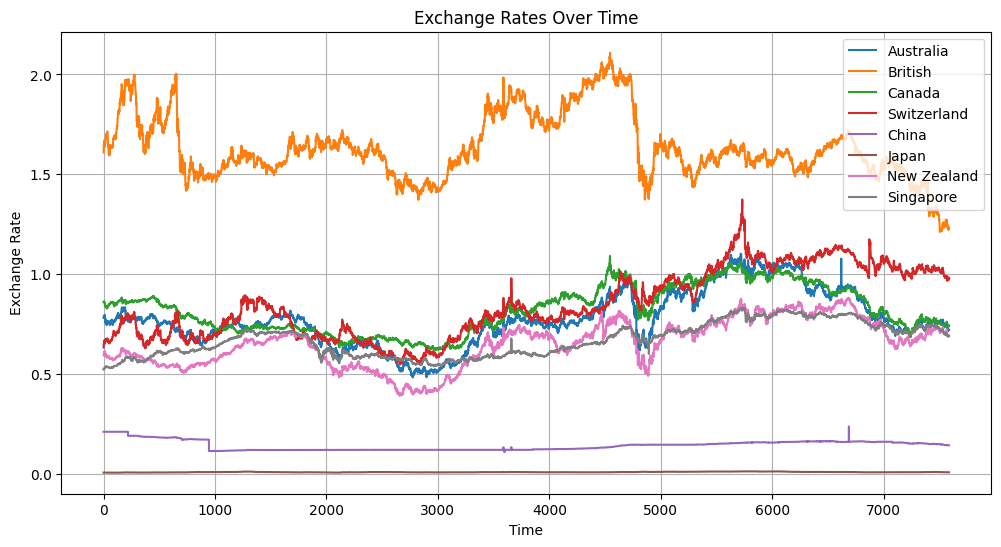

In [8]:
# Plotting the exchange rates over time
plt.figure(figsize=(12, 6))

# Plot each currency exchange rate
for currency in df[exchange_country]:
    plt.plot(df.index, df[currency], label=currency)

plt.title('Exchange Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
start_date = '1996-01-11'
date_range = pd.date_range(start=start_date, periods=len(df), freq='D')

# Asignar fechas al DataFrame
df['Date'] = date_range
df.set_index('Date', inplace=True)

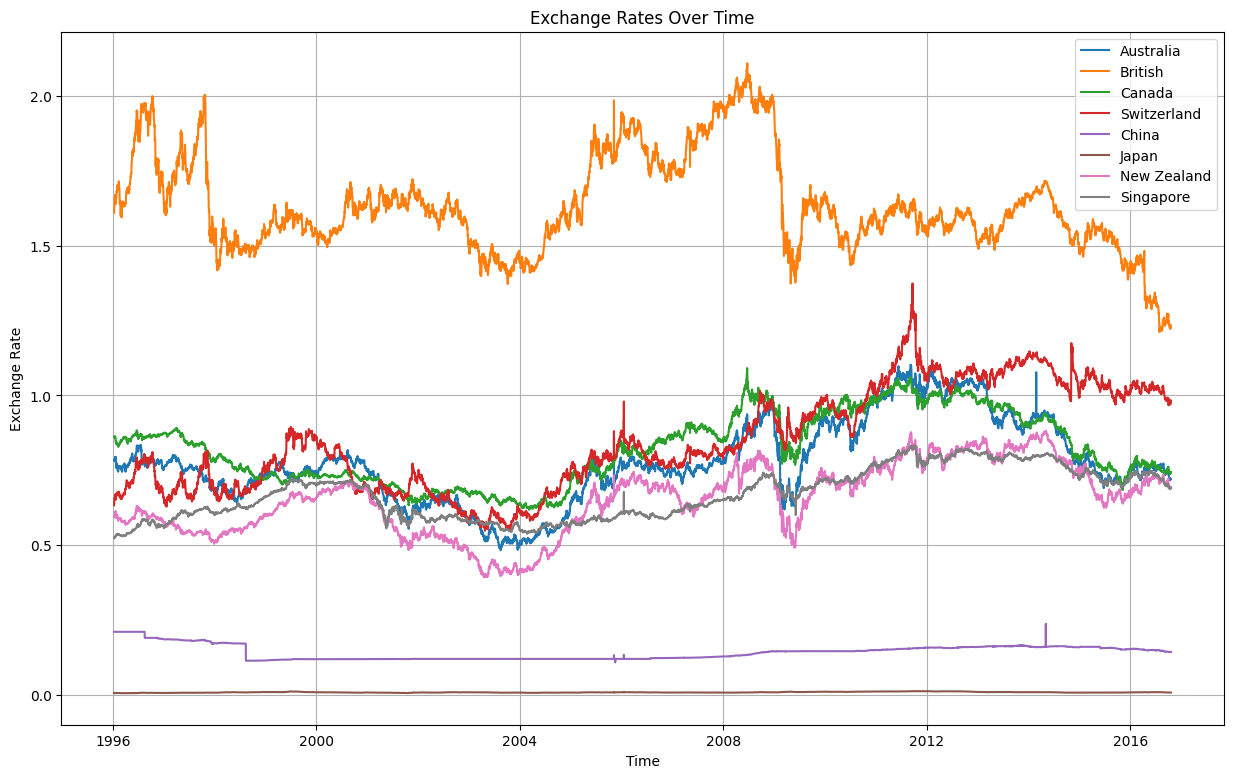

In [10]:
plt.figure(figsize=(15, 9))


for currency in df[exchange_country]:
    plt.plot(df.index, df[currency], label=currency)



plt.title('Exchange Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

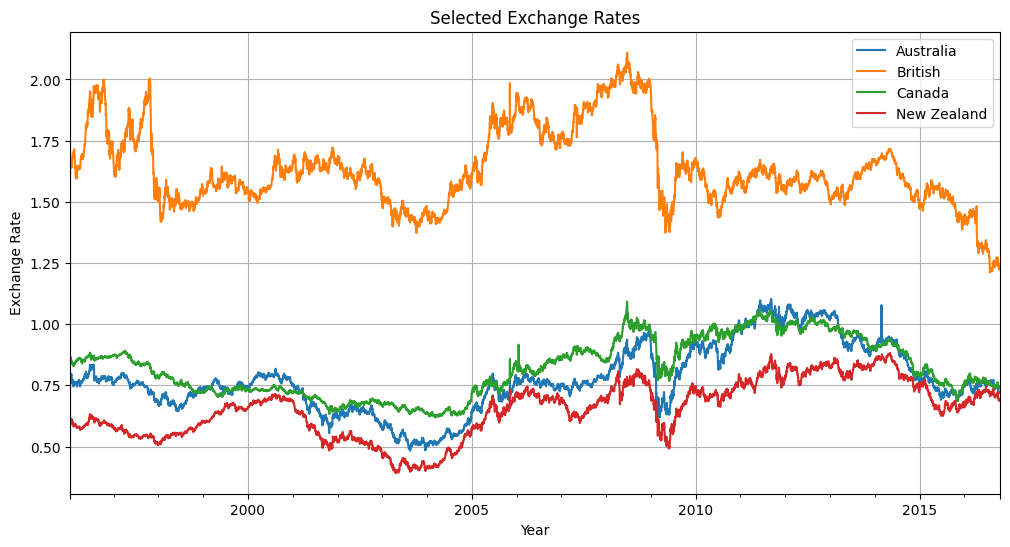

In [11]:
# Graficar solo algunas monedas
df[['Australia', 'British', 'Canada', 'New Zealand']].plot(figsize=(12, 6), title="Selected Exchange Rates")
plt.ylabel("Exchange Rate")
plt.xlabel("Year")
plt.grid()
plt.show()

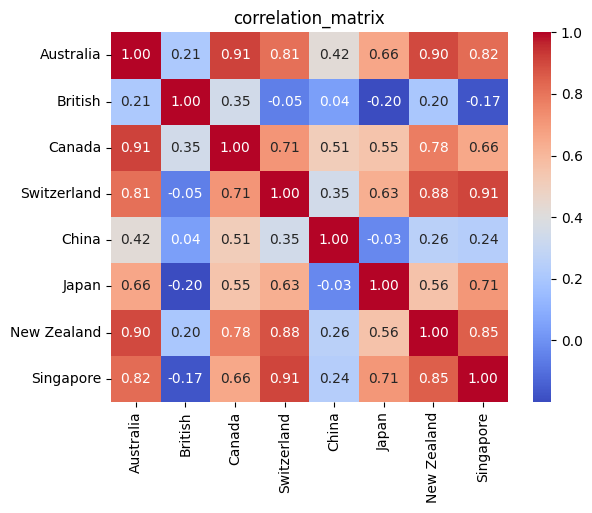

In [13]:
correlation_matrix = df[exchange_country].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation_matrix")
plt.show()

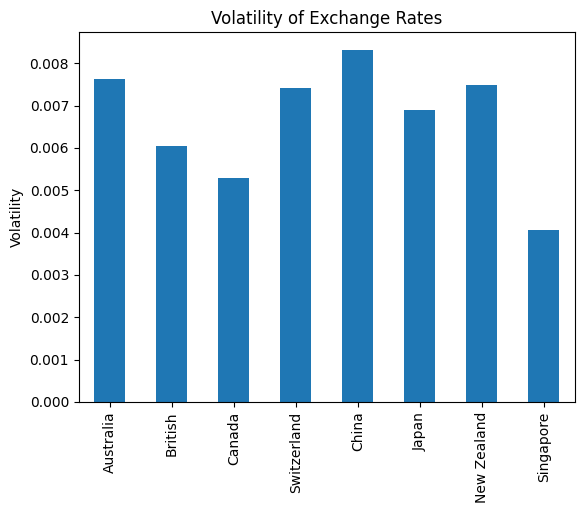

In [12]:
# Calcular volatilidad (desviación estándar diaria)
volatility = df[exchange_country].pct_change().std()

# Graficar la volatilidad
volatility.plot(kind='bar', title='Volatility of Exchange Rates')
plt.ylabel("Volatility")
plt.show()


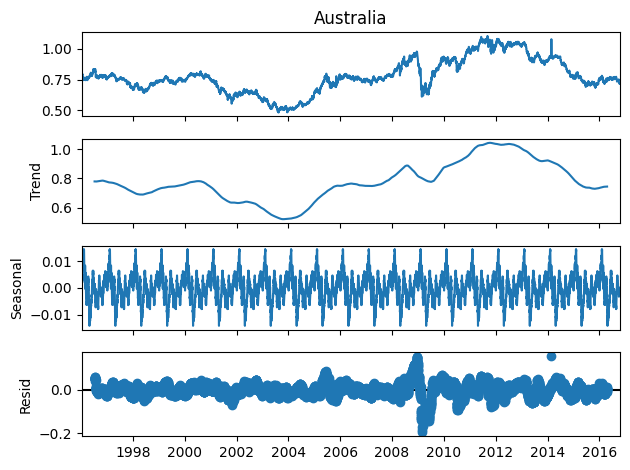

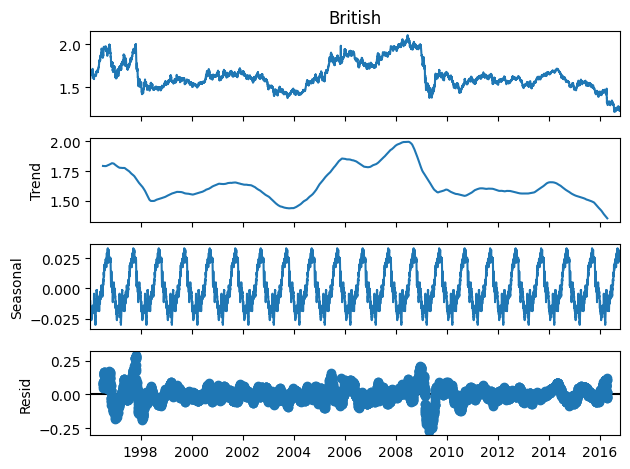

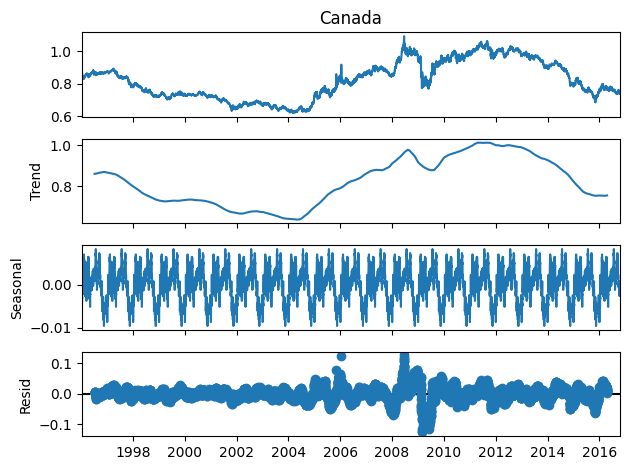

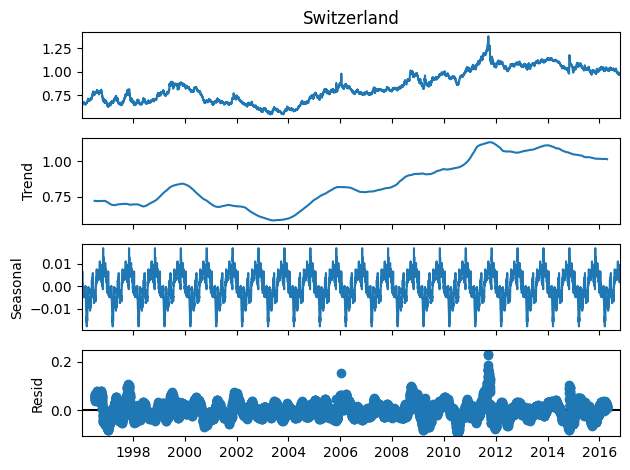

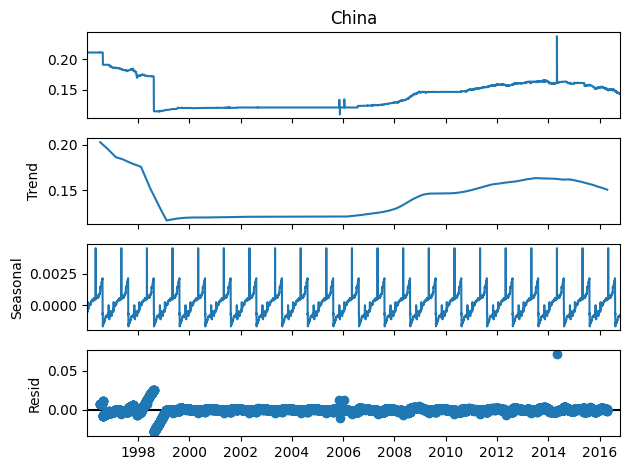

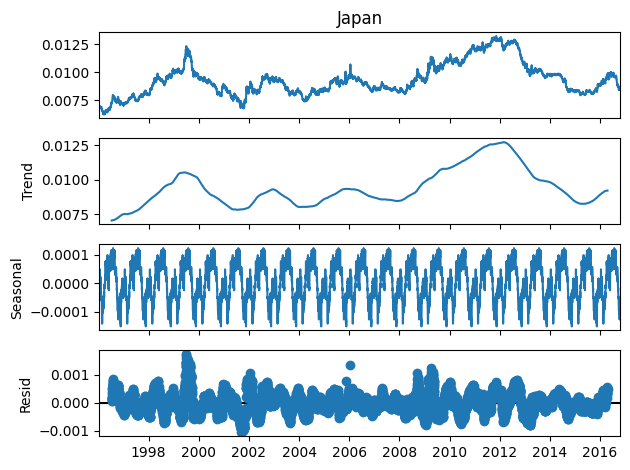

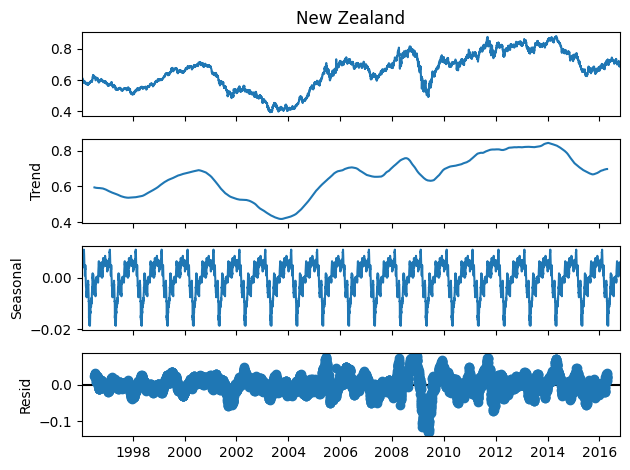

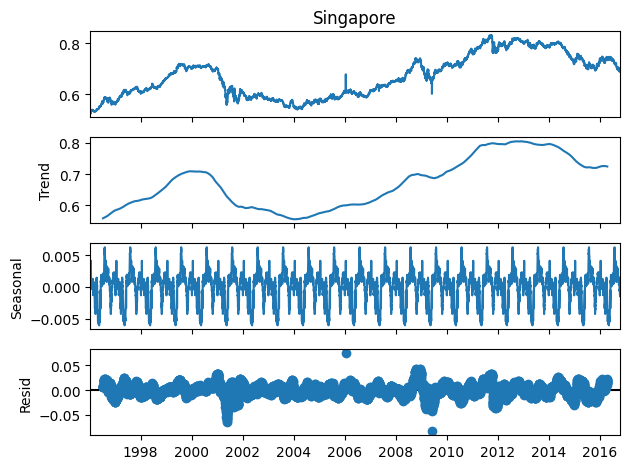

In [13]:
for currency in exchange_country:
    result = seasonal_decompose(df[currency], model='additive', period=365)
    result.plot()
    plt.show()

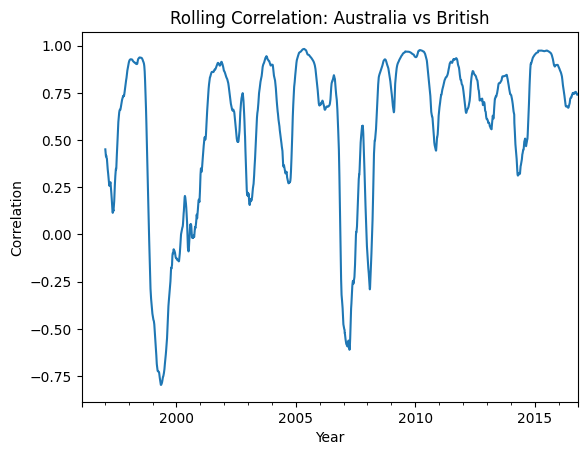

In [14]:
# Rolling correlation
rolling_corr = df['Australia'].rolling(365).corr(df['Canada'])
rolling_corr.plot(title="Rolling Correlation: Australia vs British")
plt.ylabel("Correlation")
plt.xlabel("Year")
plt.show()


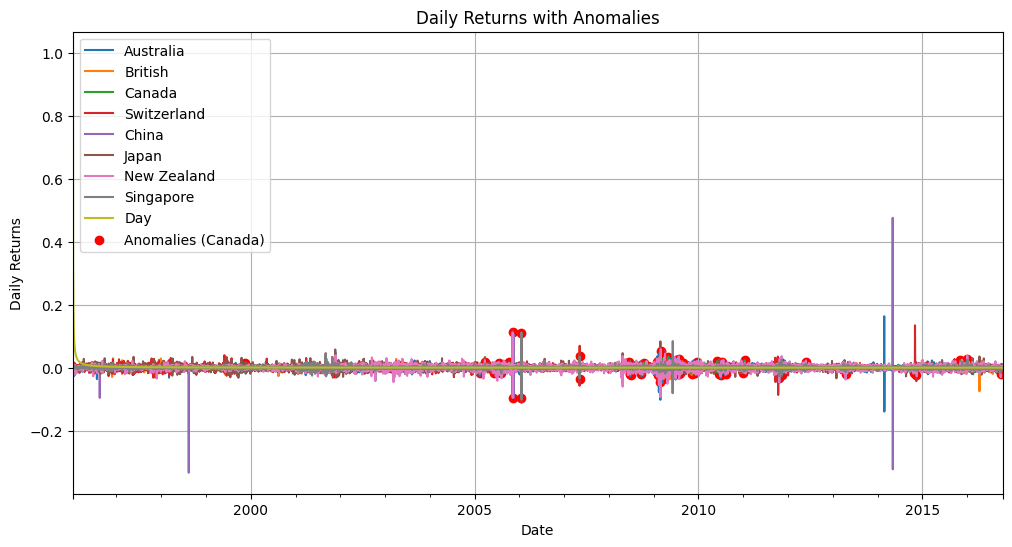

In [16]:
# Calculamos los cambios porcentuales
returns = df.pct_change()

# Definir el umbral de anomalías
threshold = 3
anomalies = returns[(returns > returns.mean() + threshold * returns.std()) |
                    (returns < returns.mean() - threshold * returns.std())]

# Graficar los cambios porcentuales
returns.plot(figsize=(12, 6), title="Daily Returns with Anomalies")
plt.scatter(anomalies.index, anomalies['Canada'], color='red', label='Anomalies (Canada)')
plt.ylabel("Daily Returns")
plt.xlabel("Date")
plt.legend()
plt.grid()
plt.show()



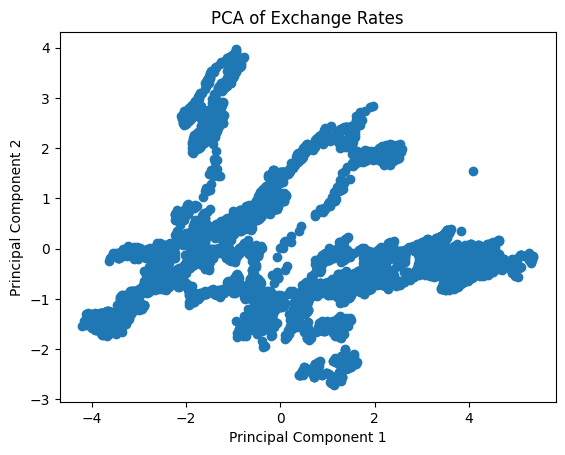

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaled_data = StandardScaler().fit_transform(df)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizar
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of Exchange Rates')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


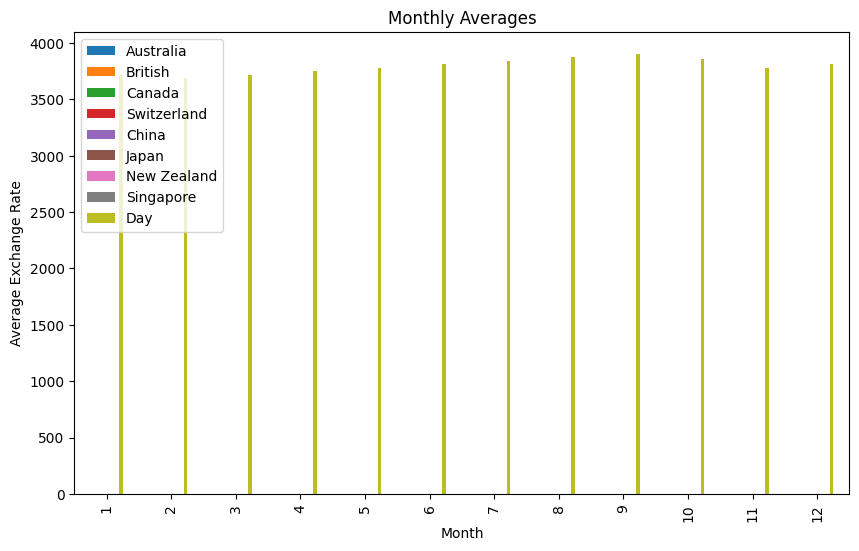

In [21]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month').mean()

# Graficar patrones estacionales
monthly_avg.plot(kind='bar', figsize=(10, 6), title="Monthly Averages")
plt.ylabel("Average Exchange Rate")
plt.show()


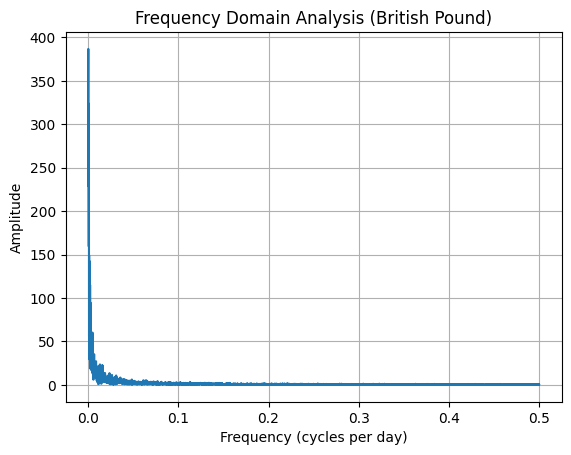

In [22]:
import numpy as np


# Transformada de Fourier
fft_result = np.fft.fft(df['British'])
frequencies = np.fft.fftfreq(len(fft_result))

# Filtrar frecuencias positivas
positive_frequencies = frequencies[frequencies > 0]
positive_amplitudes = np.abs(fft_result[frequencies > 0])

# Graficar
plt.plot(positive_frequencies, positive_amplitudes)
plt.title('Frequency Domain Analysis (British Pound)')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


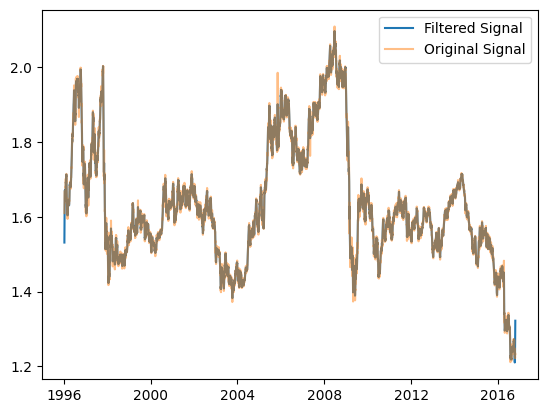

In [23]:
# Filtrar componentes de alta frecuencia
fft_filtered = fft_result.copy()
fft_filtered[frequencies > 0.05] = 0  # Ajusta el umbral según el gráfico

# Reconstruir la señal
signal_filtered = np.fft.ifft(fft_filtered)

# Graficar señal reconstruida
plt.plot(df.index, np.real(signal_filtered), label="Filtered Signal")
plt.plot(df.index, df['British'], alpha=0.5, label="Original Signal")
plt.legend()
plt.show()


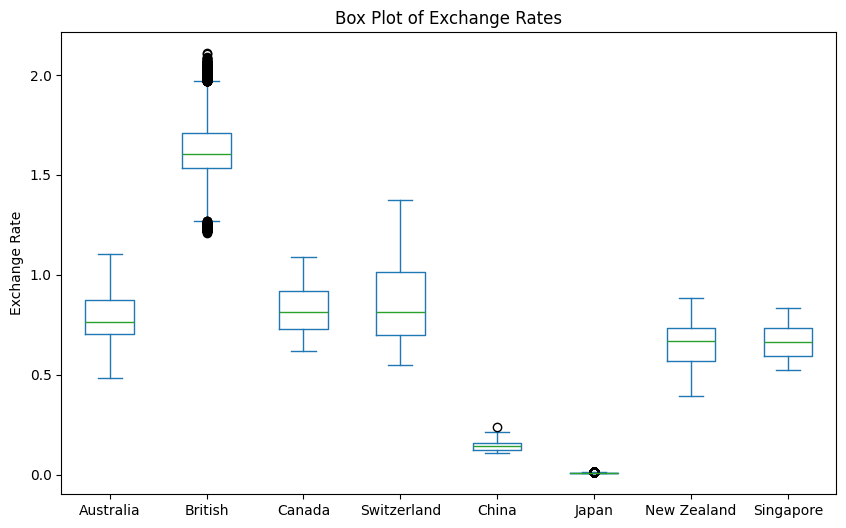

In [24]:
df[exchange_country].plot(kind='box', figsize=(10, 6), title="Box Plot of Exchange Rates")
plt.ylabel("Exchange Rate")
plt.show()

### Relation between volatility and box plot

In [ ]:
returns = df[exchange_country].pct_change()
volatility = returns.std()
iqr = df[exchange_country].quantile(0.75) - df[exchange_country].quantile(0.25) # size of boxplot

# Comparar con la volatilidad
comparison = pd.DataFrame({
    'Volatility': volatility,
    'IQR': iqr
})
print(comparison)


             Volatility       IQR
Australia      0.007631  0.172092
British        0.006045  0.174956
Canada         0.005282  0.192507
Switzerland    0.007429  0.317144
China          0.008317  0.039128
Japan          0.006885  0.001664
New Zealand    0.007498  0.168968
Singapore      0.004064  0.138539


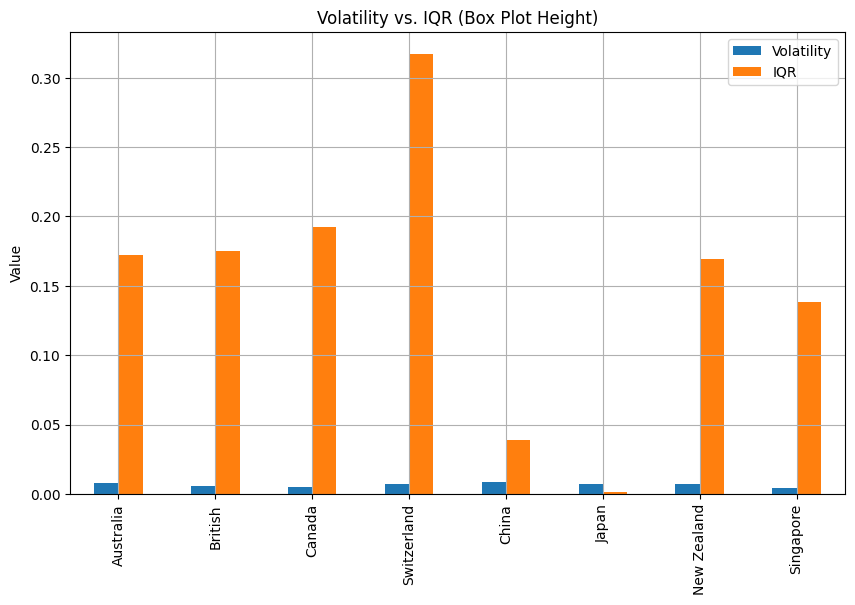

In [29]:
comparison.plot(kind='bar', figsize=(10, 6), title="Volatility vs. IQR (Box Plot Height)")
plt.ylabel("Value")
plt.grid()
plt.show()